In [1]:
import pandas as pd
beers = pd.read_csv('beers.csv') 
breweries = pd.read_csv('breweries.csv')

In [3]:
beers_and_breweries = pd.merge(beers, 
                               breweries, 
                               how='inner', 
                               left_on="brewery_id", 
                               right_on="id", 
                               sort=True,
                               suffixes=('_beer', '_brewery'))

In [4]:
beers.dtypes

Unnamed: 0      int64
abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

In [5]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))

In [6]:
# Beers Variables
print_categories(beers)

('Unnamed: 0', ': ', 'Numerical')
('abv', ': ', 'Numerical')
('ibu', ': ', 'Numerical')
('id', ': ', 'Numerical')
('name', ': ', 'Categorical')
('style', ': ', 'Categorical')
('brewery_id', ': ', 'Numerical')
('ounces', ': ', 'Numerical')


In [7]:
# Breweries Variables
print_categories(breweries)

('Unnamed: 0', ': ', 'Numerical')
('name', ': ', 'Categorical')
('city', ': ', 'Categorical')
('state', ': ', 'Categorical')
('id', ': ', 'Numerical')


In [8]:
# Descriptive Statistics

In [9]:
length = len(beers["ibu"])
print(length)

2410


In [10]:
count = beers["ibu"].count()
print(count)

1405


In [19]:
# Missing Values
number_of_missing_values = length - count
pct_of_missing_values = float(number_of_missing_values)/length
pct_of_missing_values = "{0:.1f}%".format(pct_of_missing_values*100)
print(pct_of_missing_values)

41.7%


In [20]:
# Minimum/Maximum Value
print("Minimum value: ", beers["ibu"].min())
print("Maximum value: ", beers["ibu"].max())

('Minimum value: ', 4.0)
('Maximum value: ', 138.0)


In [21]:
# Mode
print(beers["ibu"].mode())

0    20.0
dtype: float64


In [24]:
# Mean
mean = beers["ibu"].mean

In [25]:
# Median
median = beers["ibu"].median()

In [26]:
# Standard Deviation
standarddev = beers["ibu"].std()
standarddev

25.954065911259317

In [28]:
quantile = beers["ibu"].quantile([.25, .5, .75])
quantile

0.25    21.0
0.50    35.0
0.75    64.0
Name: ibu, dtype: float64

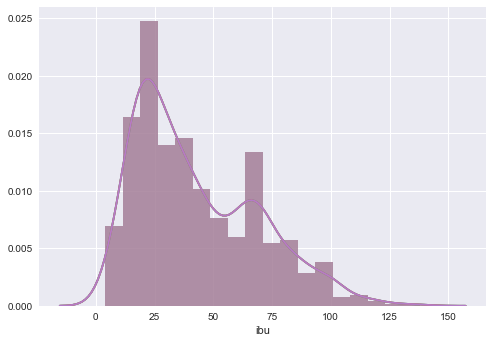

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(beers["ibu"].dropna());
plt.show()

In [34]:
# Correlations
beers[["abv", "ibu", "ounces"]].corr()

,abv,ibu,ounces
abv,1.000000,0.670621,0.172529
ibu,0.670621,1.000000,0.054691
ounces,0.172529,0.054691,1.000000


In [35]:
beers[["name", "style"]].describe()

,name,style
count,2410,2405
unique,2305,99
top,Nonstop Hef Hop,American IPA
freq,12,424


In [36]:
import pandas_profiling 

pandas_profiling.ProfileReport(beers_and_breweries)

ImportError: No module named pandas_profiling